# AEWS Python Notebook 09_check2: Analysis of processing times

In [1]:
%matplotlib inline
from netCDF4 import Dataset, num2date, date2num
import numpy as np
import xarray as xr
import matplotlib.image as img
import matplotlib.pyplot as plt

from matplotlib import rcParams as rcp
rcp['axes.formatter.useoffset'] = False
rcp['figure.figsize'] = (10,10)

import pickle
from sklearn import linear_model

In [2]:
pckl_name = '/g/data/jr4/vis_data_v3.0/WQproc_2016-08-16_09-59-37.pckl'
cpu_data = pickle.load(open( pckl_name, "r" ))

## Percentile range

array([ 14.31200722,  23.66301847,  66.41670603])

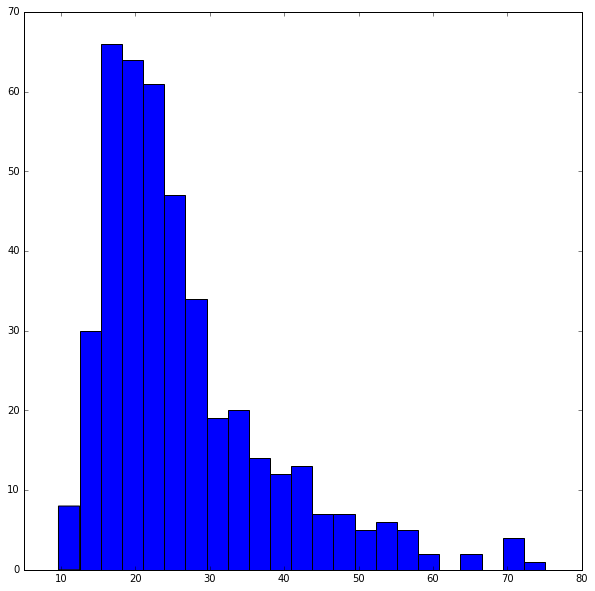

In [3]:
Y = cpu_data[:,0]
plt.hist(Y, bins=250); plt.xlim(5,80)
np.percentile(Y,(5.0,50.0,95.0))   # 90% percentile range

## Scatter plots

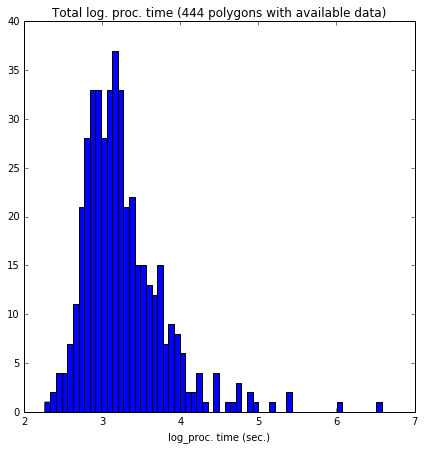

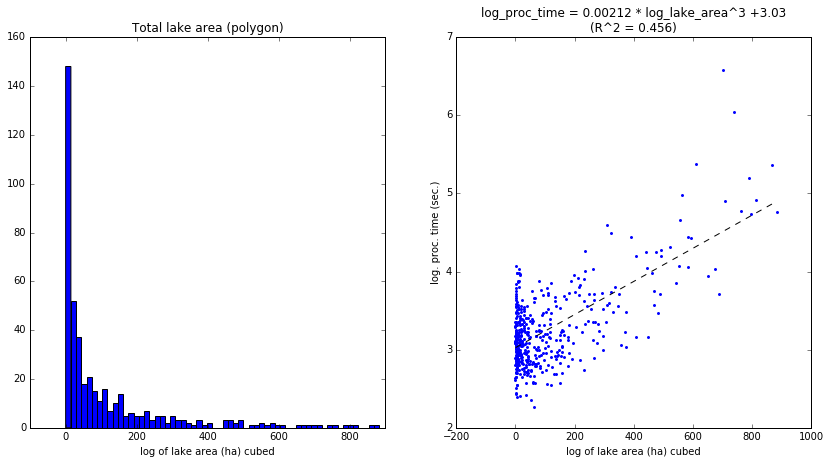

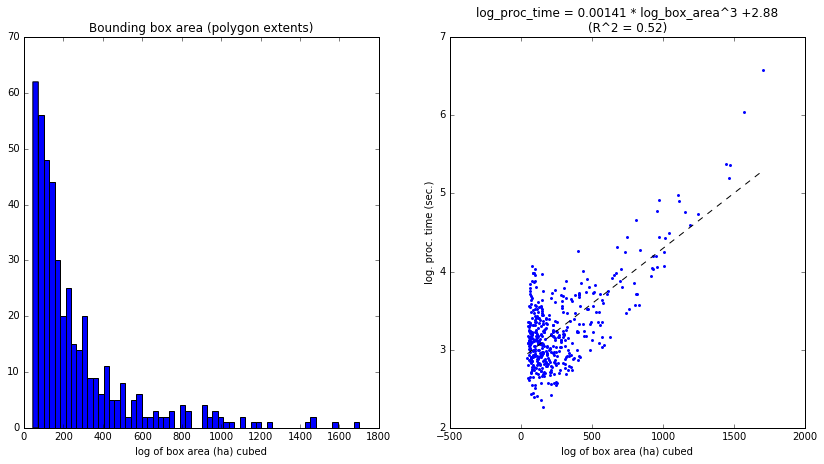

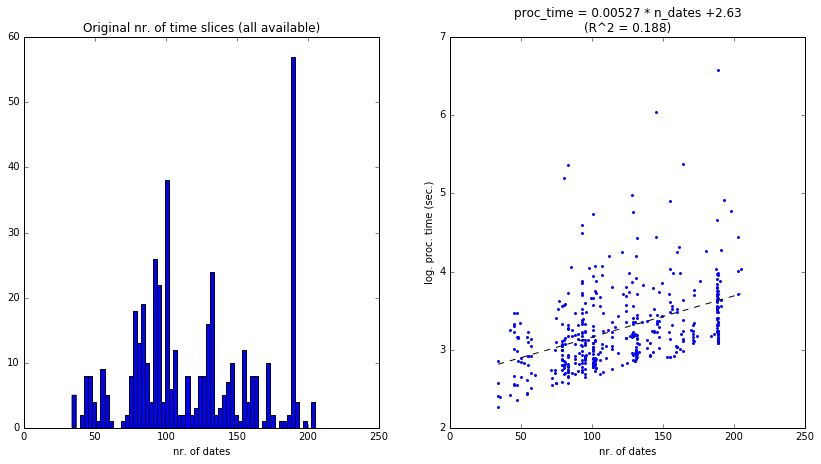

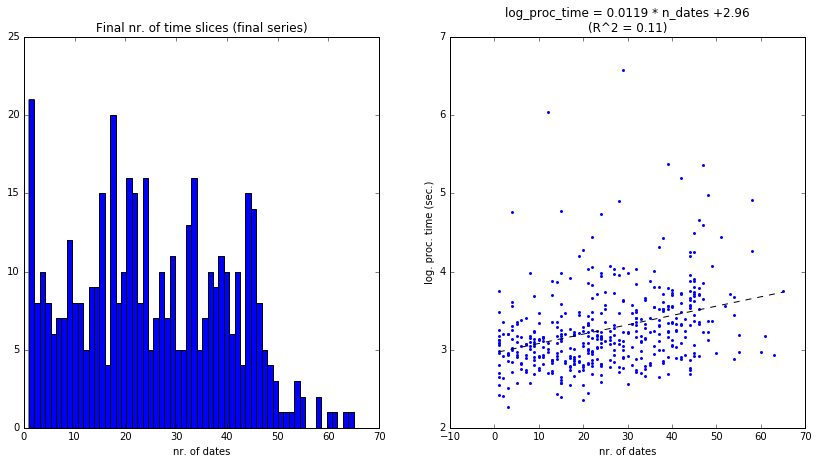

In [4]:
reg = linear_model.LinearRegression()

idx = np.where( ~np.isnan(cpu_data[:,0]) )[0]
n_cpu = len(idx)

if n_cpu==0:
    print( "No CPU times to analyse." )
else:
    cpu_data = cpu_data[idx,:]
    Y = np.log( cpu_data[:,0] )
    
    plt.figure(figsize=(7,7))
    plt.hist(Y, bins=60)
    plt.xlabel("log_proc. time (sec.)")
    plt.title( 'Total log. proc. time ({} polygons with available data)'.format(n_cpu) )

    plt.figure(figsize=(14,7)); plt.subplot(1,2,1)
    X = np.power( np.log(cpu_data[:,1]), 3 ); plt.hist(X, bins=60)
    X_lakearea = X.copy()
    plt.xlabel("log of lake area (ha) cubed"); plt.title('Total lake area (polygon)')
    plt.subplot(1,2,2)
    reg.fit( np.matrix(X).T, np.matrix(Y).T ); plt.scatter( X, Y, marker='.', edgecolor='blue', s=15 )
    xx = np.matrix( (np.nanmin(X), np.nanmax(X)) ).T; plt.plot( xx, reg.predict( xx ), 'k--' )
    plt.xlabel('log of lake area (ha) cubed'); plt.ylabel('log. proc. time (sec.)');
    tmp = 'log_proc_time = {:.3g} * log_lake_area^3 {:+.3g}'.format(reg.coef_[0][0],reg.intercept_[0])
    tmp = tmp + '\n(R^2 = {0:.3g})'.format(reg.score(np.matrix(X).T, np.matrix(Y).T))
    plt.title(tmp)

    plt.figure(figsize=(14,7)); plt.subplot(1,2,1)
    X = np.power( np.log(cpu_data[:,2]), 3 ); plt.hist(X, bins=60)
    X_boxarea = X.copy()
    plt.xlabel("log of box area (ha) cubed"); plt.title('Bounding box area (polygon extents)')
    plt.subplot(1,2,2)
    reg.fit( np.matrix(X).T, np.matrix(Y).T ); plt.scatter( X, Y, marker='.', edgecolor='blue', s=15 )
    xx = np.matrix( (np.nanmin(X), np.nanmax(X)) ).T; plt.plot( xx, reg.predict( xx ), 'k--' )
    plt.xlabel('log of box area (ha) cubed'); plt.ylabel('log. proc. time (sec.)');
    tmp = 'log_proc_time = {:.3g} * log_box_area^3 {:+.3g}'.format(reg.coef_[0][0],reg.intercept_[0])
    tmp = tmp + '\n(R^2 = {0:.3g})'.format(reg.score(np.matrix(X).T, np.matrix(Y).T))
    plt.title(tmp)

#     plt.figure(figsize=(14,7)); plt.subplot(1,2,1)
#     X = cpu_data[:,3]; plt.hist(X, bins=60)
#     plt.xlabel("window length (days)"); plt.title('Total nr. of days (time window)')
#     plt.subplot(1,2,2)
#     reg.fit( np.matrix(X).T, np.matrix(Y).T ); plt.scatter( X, Y, marker='.', edgecolor='blue', s=15 )
#     xx = np.matrix( (np.nanmin(X), np.nanmax(X)) ).T; plt.plot( xx, reg.predict( xx ), 'k--' )
#     plt.xlabel('window length (days)'); plt.ylabel('log. proc. time (sec.)');
#     tmp = 'log_proc_time = {:.3g} * window_days {:+.3g}'.format(reg.coef_[0][0],reg.intercept_[0])
#     tmp = tmp + '\n(R^2 = {0:.3g})'.format(reg.score(np.matrix(X).T, np.matrix(Y).T))
#     plt.title(tmp)

    plt.figure(figsize=(14,7)); plt.subplot(1,2,1)
    X = cpu_data[:,4]; plt.hist(X, bins=60)
    X_nrdates = X.copy()
    plt.xlabel("nr. of dates"); plt.title('Original nr. of time slices (all available)')
    plt.subplot(1,2,2)
    reg.fit( np.matrix(X).T, np.matrix(Y).T ); plt.scatter( X, Y, marker='.', edgecolor='blue', s=15 )
    xx = np.matrix( (np.nanmin(X), np.nanmax(X)) ).T; plt.plot( xx, reg.predict( xx ), 'k--' )
    plt.xlabel('nr. of dates'); plt.ylabel('log. proc. time (sec.)');
    tmp = 'proc_time = {:.3g} * n_dates {:+.3g}'.format(reg.coef_[0][0],reg.intercept_[0])
    tmp = tmp + '\n(R^2 = {0:.3g})'.format(reg.score(np.matrix(X).T, np.matrix(Y).T))
    plt.title(tmp)

    plt.figure(figsize=(14,7)); plt.subplot(1,2,1)
    X = cpu_data[:,5]; plt.hist(X, bins=60)
    X_nrdates2 = X.copy()
    plt.xlabel("nr. of dates"); plt.title('Final nr. of time slices (final series)')
    plt.subplot(1,2,2)
    reg.fit( np.matrix(X).T, np.matrix(Y).T ); plt.scatter( X, Y, marker='.', edgecolor='blue', s=15 )
    xx = np.matrix( (np.nanmin(X), np.nanmax(X)) ).T; plt.plot( xx, reg.predict( xx ), 'k--' )
    plt.xlabel('nr. of dates'); plt.ylabel('log. proc. time (sec.)');
    tmp = 'log_proc_time = {:.3g} * n_dates {:+.3g}'.format(reg.coef_[0][0],reg.intercept_[0])
    tmp = tmp + '\n(R^2 = {0:.3g})'.format(reg.score(np.matrix(X).T, np.matrix(Y).T))
    plt.title(tmp)


## Checking correlation among area / dates variables

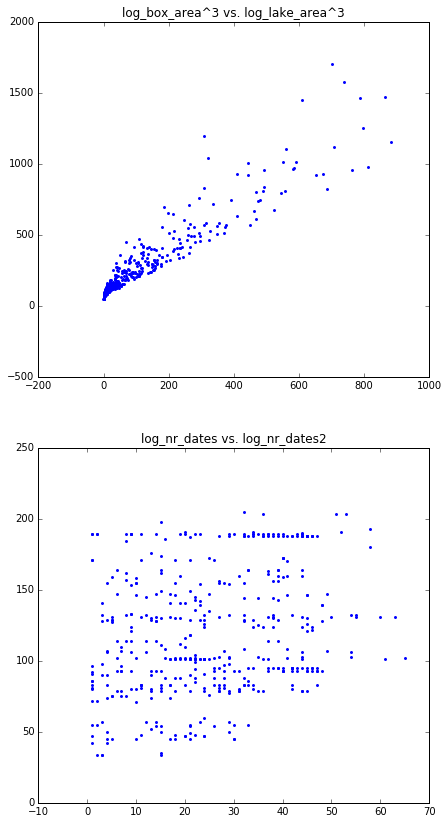

In [5]:
plt.figure(figsize=(7,14))
plt.subplot(2,1,1)
plt.scatter( X_lakearea, X_boxarea, marker='.', edgecolor='blue', s=15 )
plt.title('log_box_area^3 vs. log_lake_area^3')

# plt.subplot(2,2,2)
# plt.scatter( np.exp(X_lakearea), np.exp(X_boxarea), marker='.', edgecolor='blue', s=15 )
# plt.title('box_area vs. lake_area')

plt.subplot(2,1,2)
plt.scatter( X_nrdates2, X_nrdates, marker='.', edgecolor='blue', s=15 )
plt.title('log_nr_dates vs. log_nr_dates2')

# plt.subplot(2,2,4)
# plt.scatter( np.exp(X_nrdates2), np.exp(X_nrdates), marker='.', edgecolor='blue', s=15 )
# plt.title('nr_dates vs. nr_dates2')

## Regressions

... with `nrdates` (original time series):

In [6]:
X_tmp = np.ones((len(X_boxarea),2))
X_tmp[:,0] = X_boxarea
X_tmp[:,1] = X_nrdates

reg.fit( np.matrix(X_tmp), np.matrix(Y).T )

print( 'log_proc_time = {:.3g} * log_box_area^3 {:+.3g} * n_dates {:+.3g}'.format(
        reg.coef_[0][0],reg.coef_[0][1],reg.intercept_[0]) )
print( 'R^2 = {0:.3g}'.format(reg.score(np.matrix(X_tmp), np.matrix(Y).T)) )

log_proc_time = 0.00138 * log_box_area^3 +0.00487 * n_dates +2.31
R^2 = 0.68


In [7]:
X_tmp = np.ones((len(X_boxarea),2))
X_tmp[:,0] = X_lakearea
X_tmp[:,1] = X_nrdates

reg.fit( np.matrix(X_tmp), np.matrix(Y).T )

print( 'log_proc_time = {:.3g} * log_lake_area^3 {:+.3g} * n_dates {:+.3g}'.format(
        reg.coef_[0][0],reg.coef_[0][1],reg.intercept_[0]) )
print( 'R^2 = {0:.3g}'.format(reg.score(np.matrix(X_tmp), np.matrix(Y).T)) )

log_proc_time = 0.00204 * log_lake_area^3 +0.00475 * n_dates +2.47
R^2 = 0.609


... with `nrdates2` (final time series):

In [8]:
X_tmp = np.ones((len(X_boxarea),2))
X_tmp[:,0] = X_boxarea
X_tmp[:,1] = X_nrdates2

reg.fit( np.matrix(X_tmp), np.matrix(Y).T )

print( 'log_proc_time = {:.3g} * log_box_area^3 {:+.3g} * n_dates2 {:+.3g}'.format(
        reg.coef_[0][0],reg.coef_[0][1],reg.intercept_[0]) )
print( 'R^2 = {0:.3g}'.format(reg.score(np.matrix(X_tmp), np.matrix(Y).T)) )

log_proc_time = 0.00134 * log_box_area^3 +0.00408 * n_dates2 +2.8
R^2 = 0.532


In [9]:
X_tmp = np.ones((len(X_boxarea),2))
X_tmp[:,0] = X_lakearea
X_tmp[:,1] = X_nrdates2

reg.fit( np.matrix(X_tmp), np.matrix(Y).T )

print( 'log_proc_time = {:.3g} * log_lake_area^3 {:+.3g} * n_dates2 {:+.3g}'.format(
        reg.coef_[0][0],reg.coef_[0][1],reg.intercept_[0]) )
print( 'R^2 = {0:.3g}'.format(reg.score(np.matrix(X_tmp), np.matrix(Y).T)) )

log_proc_time = 0.00199 * log_lake_area^3 +0.00493 * n_dates2 +2.92
R^2 = 0.473


All available variables:

In [10]:
X_tmp = np.ones((len(X_boxarea),4))
X_tmp[:,0] = X_boxarea
X_tmp[:,1] = X_lakearea
X_tmp[:,2] = X_nrdates
X_tmp[:,3] = X_nrdates2

reg.fit( np.matrix(X_tmp), np.matrix(Y).T )

print( 'log_proc_time = {:.3g} * log_box_area^3 \n\t\t{:+.3g} * log_lake_area^3 \n\t\t{:+.3g} * n_dates \n\t\t{:+.3g} * n_dates2 {:+.3g}'.format(
        reg.coef_[0][0],reg.coef_[0][1],reg.coef_[0][2],reg.coef_[0][3],reg.intercept_[0]) )
print( 'R^2 = {0:.3g}'.format(reg.score(np.matrix(X_tmp), np.matrix(Y).T)) )

log_proc_time = 0.00161 * log_box_area^3 
		-0.00039 * log_lake_area^3 
		+0.0049 * n_dates 
		+2.58e-05 * n_dates2 +2.29
R^2 = 0.682
